# Decision Tree Classification, Random Forest,  Adaboosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

#To split dataset to training and test set
from sklearn.model_selection import train_test_split

#classifier
from sklearn.tree import DecisionTreeClassifier

#to obtain accuracy score of model
from sklearn.metrics import accuracy_score

#to generate classification report
from sklearn.metrics import classification_report

# Load Data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Analyse Data

In [3]:
print("Dataset length:", len(df))

Dataset length: 303


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


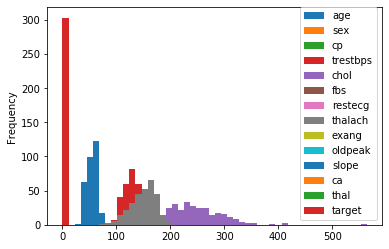

In [6]:
df.plot.hist(bins=50)

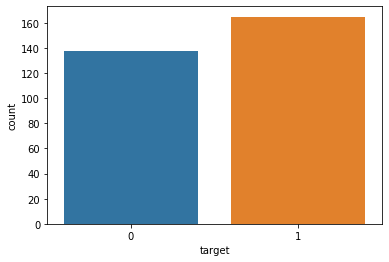

In [7]:
sns.countplot(x="target", data=df)

# Split Data set to train set and test set 

In [8]:
X = df.drop(columns='target')
y = df['target']

# Process to split data 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
#Data split Test set 20% train set 80%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Fetching the splited dataset i.e given train and test data 
train_set = pd.read_csv('Heart_train.csv')
test_set = pd.read_csv('Heart_test.csv')
X_train = train_set.drop(columns='target')
y_train = train_set.target

X_test = test_set.drop(columns='target')
y_test = test_set.target

print(len(train_set))
print(len(test_set))


242
61


# Feature Extraction 

### OneHotEncoding

One-Hot Encoding
We need to One-Hot-Encoded the Categorical Columns. Q. Why?

Use OneHotEncoder to encode the categorical columns then concat (horizontally; axis=1) to get final DataFrame.

Repeat for Test set.

At the end we should have X_train_encoded and X_test_encoded

In [10]:
cat_columns = ['cp', 'exang', 'slope', 'thal']
num_columns = [c for c in X_train.columns if c not in cat_columns]

In [11]:
print(cat_columns)

['cp', 'exang', 'slope', 'thal']


In [12]:
print(num_columns)

['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak', 'ca']


In [13]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder()
num_columns + list(cat_columns)

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'oldpeak',
 'ca',
 'cp',
 'exang',
 'slope',
 'thal']

In [14]:
# create oneHotEncoder instance
encoder = OneHotEncoder(handle_unknown='ignore')


#Fit on categorical columns
encoder.fit(X_train[cat_columns])


#Transform on training data
encoder.categories_
X_train_cat_encoded = encoder.transform(X_train[cat_columns])

column_names = encoder.get_feature_names(input_features = cat_columns)
print(column_names)
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded.todense(), 
                                      columns=column_names, 
                                      index=X_train.index)
X_train_cat_encoded_df

['cp_0' 'cp_1' 'cp_2' 'cp_3' 'exang_0' 'exang_1' 'slope_0' 'slope_1'
 'slope_2' 'thal_0' 'thal_1' 'thal_2' 'thal_3']


,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
238,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
239,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
240,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
X_train_encoded = pd.concat([X_train[num_columns],X_train_cat_encoded_df], axis=1)
X_train_encoded
X_train_encoded.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'exang_0', 'exang_1',
       'slope_0', 'slope_1', 'slope_2', 'thal_0', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

In [16]:
X_test_cat_encoded = encoder.transform(X_test[cat_columns])

X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded.todense(),
                                    columns=column_names,
                                    index=X_test.index)
X_test_encoded = pd.concat([X_test[num_columns], X_test_cat_encoded_df], axis=1)

X_test_encoded.shape
assert len(X_test_encoded)==len(X_test)

X_test_encoded


,age,sex,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,cp_0,...,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,58,1,120,284,0,0,160,1.8,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,52,1,112,230,0,1,160,0.0,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42,0,120,209,0,1,173,0.0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,55,1,130,262,0,1,155,0.0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,53,0,130,264,0,0,143,0.4,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,55,0,128,205,0,2,130,2.0,1,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
57,58,1,114,318,0,2,140,4.4,3,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
58,58,1,125,300,0,0,171,0.0,2,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
59,43,1,115,303,0,1,181,1.2,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Model Build

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
#train with gini Index

In [63]:
# Default paramater for decisionTreeClassifier
def train_using_gini(X_train, X_test, y_train):
    #classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state= 100, max_depth = 3, min_samples_leaf = 5)
    
    #training
    clf_gini.fit(X_train, y_train)
    
    return clf_gini

In [64]:
#training with entropy

In [91]:
# Criterion = Entropy => fxn that measures the quality of split
# Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of data.
# The higher the entropy the more the information content.
def train_using_entropy(X_train, X_test, y_train): 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
    clf_entropy.fit(X_train, y_train)
    return clf_entropy 
  

In [93]:
# Function to make predictions 
def prediction(X_test, clf_object): 
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      

In [85]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
    confusion_matrix(y_test, y_pred)) 

    
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 

    
    
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  

### GINI index

In [86]:
clf_gini = train_using_gini(X_train_encoded, X_test_encoded, y_train)       

In [87]:
# Prediction using gini 
y_pred_gini = prediction(X_test_encoded, clf_gini) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')
Predicted values:
[1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0]


In [88]:
cal_accuracy(y_test, y_pred_gini) 


Confusion Matrix:  [[22  6]
 [ 5 28]]
Accuracy :  81.9672131147541
Report :                precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [94]:
# Now using entropy predictiona nd accuracy

clf_entropy = train_using_entropy(X_train_encoded, X_test_encoded, y_train) 
clf_entropy

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [95]:
y_pred_entropy = prediction(X_test_encoded, clf_entropy) 


cal_accuracy(y_test, y_pred_entropy) 
      

Predicted values:
[1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0
 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1]
Confusion Matrix:  [[21  7]
 [ 4 29]]
Accuracy :  81.9672131147541
Report :                precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



# Decision Tree Classifier (Out-of-the-box)
Compute classification_report for DecisionTreeClassifier out-of-the-box.

In [96]:
model = DecisionTreeClassifier(random_state = 1)
model.fit(X_train_encoded, y_train)
preds = model.predict(X_test_encoded)
cal_accuracy(y_test, preds) 

print(classification_report(y_test, preds))

Confusion Matrix:  [[20  8]
 [11 22]]
Accuracy :  68.85245901639344
Report :                precision    recall  f1-score   support

           0       0.65      0.71      0.68        28
           1       0.73      0.67      0.70        33

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        28
           1       0.73      0.67      0.70        33

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [35]:
cal_accuracy(y_test, preds) 


Confusion Matrix:  [[20  8]
 [11 22]]
Accuracy :  68.85245901639344
Report :                precision    recall  f1-score   support

           0       0.65      0.71      0.68        28
           1       0.73      0.67      0.70        33

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [36]:
from sklearn.tree import export_graphviz  
from sklearn import tree

In [37]:
export_graphviz(model, out_file='tree.dot', 
                feature_names = X_train_encoded.columns,
                class_names = ['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

[Text(167.4, 190.26, 'X[9] <= 0.5\nentropy = 0.994\nsamples = 242\nvalue = [110, 132]'),
 Text(83.7, 135.9, 'X[20] <= 0.5\nentropy = 0.739\nsamples = 134\nvalue = [28, 106]'),
 Text(41.85, 81.53999999999999, 'X[8] <= 0.5\nentropy = 0.996\nsamples = 39\nvalue = [18, 21]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.828\nsamples = 23\nvalue = [6, 17]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.811\nsamples = 16\nvalue = [12, 4]'),
 Text(125.55000000000001, 81.53999999999999, 'X[7] <= 2.5\nentropy = 0.485\nsamples = 95\nvalue = [10, 85]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.394\nsamples = 90\nvalue = [7, 83]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(251.10000000000002, 135.9, 'X[8] <= 0.5\nentropy = 0.796\nsamples = 108\nvalue = [82, 26]'),
 Text(209.25, 81.53999999999999, 'X[21] <= 0.5\nentropy = 1.0\nsamples = 45\nvalue = [23, 22]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.84\nsample

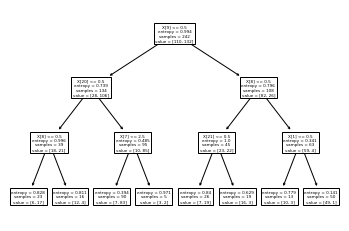

In [38]:
tree.plot_tree(clf_entropy.fit(X_train_encoded, y_train))

In [39]:
# from subprocess import call
# # 

In [40]:
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

#Hyperparamter tuning and model fitting

#Build a pipeline
tree_steps = [('tree', DecisionTreeClassifier(random_state =42))]
tree_pipe = Pipeline(tree_steps)

tree_params = {"tree__max_depth":list(range(2,20))}

tree = GridSearchCV(tree_pipe, param_grid = tree_params, cv=10, scoring = "accuracy")
tree.fit(X_train_encoded, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                       

In [42]:
#Best hyperparameters
tree.best_params_


{'tree__max_depth': 3}

In [97]:
tree_preds = tree.predict(X_test_encoded)
cal_accuracy(y_test, tree_preds) 

Confusion Matrix:  [[22  6]
 [ 5 28]]
Accuracy :  81.9672131147541
Report :                precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [44]:
def accuracy(X, y, model):
    return round(accuracy_score(y,model.predict(X)),2)

In [45]:
def plot_regions(X,y,model,ax,title):
    plt.sca(ax)
    plot_decision_regions(X=X, y=y.astype(np.integer), clf=model, legend =2)
    
    plt.title(title)
    plt.xlabel("thalach")
    plt.ylabel("cols")

In [46]:
#Performance
print("Training accuracy is: {}".format(accuracy(X_train_encoded, y_train,tree)))
print("Testing accuracy is: {}".format(accuracy(X_test_encoded, y_test,tree)))


Training accuracy is: 0.86
Testing accuracy is: 0.82


# Random Forest

In [106]:
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=100,random_state=1)
# model = RandomForestClassifier(random_state=1)
model.fit(X_train_encoded,y_train)
preds=model.predict(X_test_encoded)
accuracy_score(y_test, preds)

0.819672131147541

In [109]:
cal_accuracy(y_test,preds)

Confusion Matrix:  [[22  6]
 [ 5 28]]
Accuracy :  81.9672131147541
Report :                precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [114]:
#Performance
print("Training accuracy is: {}".format(accuracy(X_train_encoded, y_train,model)))
print("Testing accuracy is: {}".format(accuracy(X_test_encoded, y_test,model)))

Training accuracy is: 1.0
Testing accuracy is: 0.82


In [107]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#Build a random forest pipeline
rf_steps = [('rf', RandomForestClassifier(random_state=42))]
rf_pipe = Pipeline(rf_steps)

#Hyperparameter tuning
#n_estimators == no. of trees
rf_params = {"rf__n_estimators":list(range(2,11))}
rf = GridSearchCV(rf_pipe,param_grid = rf_params, cv=10)
rf.fit(X_train_encoded, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                              

In [111]:
rf.best_params_

{'rf__n_estimators': 9}

In [113]:
#Performance
print("Training accuracy is: {}".format(accuracy(X_train_encoded, y_train, rf)))
print("Testing accuracy is: {}".format(accuracy(X_test_encoded, y_test, rf)))

Training accuracy is: 0.98
Testing accuracy is: 0.74


Above accuracy result showed that , random forest model overfit on the training data.
As we are not controlling the maximum depth of each tree in the ensemble 
like in simple decision tree model.

# AdaBoosting

Boosting is an ensemble method that is fundamentally different from bagging and random forests. 
RF combines decision trees in parallel, boosting combines models additively. 
The ensemble model in boosting is a linear combination of simpler trees.
AdaBoost, which stands for Adaptive Boosting. It helps to improve performance of weak base learner by training new trees on points that were incorrectly classified. Thus, the complex model at the end of this iterative process delivers higher classification accuracy.

In [51]:
rf2.best_params_


{'rf2__min_samples_leaf': 5, 'rf2__n_estimators': 9}

In [102]:
#Performance
print("Training accuracy is: {}".format(accuracy(X_train_encoded, y_train,model)))
print("Testing accuracy is: {}".format(accuracy(X_test_encoded, y_test,model)))

Training accuracy is: 1.0
Testing accuracy is: 0.82


By controlling the minimum number of leaves in each tree limits the depth of the tree. 
With a classification accuracy of 80% on the test set, 

In [53]:
from sklearn.preprocessing import StandardScaler

#Build an adaboost pipe
boost_steps = [('standardizer', StandardScaler()),
                ('boost', AdaBoostClassifier(random_state=42))]
boost_pipe = Pipeline(boost_steps)

In [54]:
#hyperparamter tuning
boost_params = {"boost__n_estimators":list(range(2,20)), 
                "boost__learning_rate":[0.001,0.01,0.1,1,1.4,1.8,2,3,4]}
boost = GridSearchCV(boost_pipe,param_grid = boost_params, cv=10)
boost.fit(X_train_encoded, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardizer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('boost',
                                        AdaBoostClassifier(algorithm='SAMME.R',
                                                           base_estimator=None,
                                                           learning_rate=1.0,
                                                           n_estimators=50,
                                                           random_state=42))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'boost__learning_rate': [0.001, 0.01, 0.1, 1, 1.4, 1.8,
                                      

In [55]:
#Best hyperparameters
boost.best_params_

{'boost__learning_rate': 1, 'boost__n_estimators': 3}

In [56]:
#Performance
print("Training accuracy is: {}".format(accuracy(X_train_encoded, y_train,boost)))
print("Testing accuracy is: {}".format(accuracy(X_test_encoded, y_test,boost)))

Training accuracy is: 0.86
Testing accuracy is: 0.82


Accuracy obtained from AdaBoost classification is similar to simple decision tree. 


# Gradient Boosting

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train_encoded,y_train)
preds=model.predict(X_test_encoded)
accuracy_score(y_test, preds)

0.7540983606557377

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.80      0.73      0.76        33

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



In [121]:
grid_params4 = {
    'min_samples_split': (2, 4, 6, 8, 10),
    'n_estimators':(10,50,100),

}

In [122]:
 from sklearn.metrics import make_scorer, f1_score

In [124]:
scorer = make_scorer(f1_score, average='micro')
clf=GridSearchCV(GradientBoostingClassifier(),grid_params4,scoring=scorer,cv=3)
clf.fit(X_train_encoded, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [125]:
print(clf.best_score_, clf.best_params_)

0.7893518518518517 {'min_samples_split': 4, 'n_estimators': 100}


In [128]:
model =GradientBoostingClassifier(min_samples_split=4, n_estimators=100)
model.fit(X_train_encoded, y_train)
preds = model.predict(X_test_encoded)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.80      0.73      0.76        33

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



# Deployment¶

In [61]:
import pickle

In [62]:
pickle.dump(best_model,open("model.pkl","wb"))